# **DBLP Data Analysis Using Graph Characteristics**

In [1]:
#Mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import json
import re
import itertools

### Loading Json Files into Dataframes

In [3]:
dblp_dataset_df=[]

In [4]:
#Loading data from JSON file 0
dblp_dataset_df0=pd.read_json("/content/drive/MyDrive/dblp-ref-0.json", lines=True, chunksize=10000)
for chunks in dblp_dataset_df0:
  dblp_dataset_df.append(chunks)
  break

In [5]:
#Loading data from JSON file 1
dblp_dataset_df1=pd.read_json("/content/drive/MyDrive/dblp-ref-1.json", lines=True, chunksize=10000)
for chunks in dblp_dataset_df1:
  dblp_dataset_df.append(chunks)
  break

In [6]:
#Loading data from JSON file 2
dblp_dataset_df2=pd.read_json("/content/drive/MyDrive/dblp-ref-2.json", lines=True, chunksize=10000)
for chunks in dblp_dataset_df2:
  dblp_dataset_df.append(chunks)
  break

In [7]:
#Loading data from JSON file 3
dblp_dataset_df3=pd.read_json("/content/drive/MyDrive/dblp-ref-3.json", lines=True, chunksize=10000)
for chunks in dblp_dataset_df3:
  dblp_dataset_df.append(chunks)
  break

In [8]:
#Making DataFrame from concatenated chunks
dblp_dataset_df=pd.concat(dblp_dataset_df)

### Taking Random Sample from Data

In [9]:
#Extracting sample from the DataFrame
sample_size=5
dblp_dataset_df_sample=dblp_dataset_df.sample(sample_size, random_state=27092000)
dblp_dataset_df_sample

,abstract,authors,n_citation,references,title,venue,year,id
3045,Mean-variance criterion has long been the main...,"[Fei Lung Yuen, Hailiang Yang]",1,[],Optimal Asset Allocation: A Worst Scenario Exp...,Journal of Optimization Theory and Applications,2012,4b59d247-5f43-44be-86b7-2abcb7c083fb
4809,"For his JPEGs series started in 2002, German a...","[Ingrid Hoelzl, Rémi Marie]",0,[],CODEC: on Thomas Ruff's JPEGs,Digital Creativity,2014,4c4e5e56-0af1-40d7-9cf8-a2a12410fea2
7123,We augment a model of translation based on re-...,[Daniel Gildea],175,"[05d0ec98-5acc-4675-b1eb-59a960f106e3, 143db26...",Loosely Tree-Based Alignment for Machine Trans...,meeting of the association for computational l...,2003,4d1371ec-867d-498c-89b7-0b556ef32910
5873,We examine the meaning and the complexity of p...,"[Fabio Gagliardi Cozman, Denis Deratani Mauá]",0,NaN,On the Semantics and Complexity of Probabilist...,arXiv: Artificial Intelligence,2017,ded30e9c-bf53-4798-874a-bd9a567ee368
18,Abstract#R##N##R##N#This paper describes a coo...,"[Takekazu Kato, Yasuhiro Mukaigawa, Takeshi Sh...",50,"[2a01060d-15a3-483a-9227-f2a6a733f32c, 6e8cc92...",Cooperative distributed registration for robus...,Systems and Computers in Japan,2002,4aa7797c-5a71-442b-b8fe-5d930591d4d8


### Graph 1

In [10]:
#Extracting unique author names
unique_author_name=dblp_dataset_df_sample['authors'].explode().unique()
print("Count of non unique author names: ", len(dblp_dataset_df_sample['authors'].explode()))
print("Count of unique author names: ", len(unique_author_name))

Count of non unique author names:  10
Count of unique author names:  10


In [11]:
#Formatting distinct author names to a naming convention such as A1, A2, A3
author_name_convention=['A{}'.format(i) for i in range(1,len(unique_author_name)+1)]

In [12]:
#Dictionary to map old names with new names
author_dictionary=dict(zip(unique_author_name,author_name_convention))

In [13]:
#Mapping new values of author names to the column of list of authors
dblp_dataset_df_sample["new_authors"]=dblp_dataset_df_sample["authors"].apply(lambda x: pd.Series(x).map(author_dictionary).tolist())
dblp_dataset_df_sample

,abstract,authors,n_citation,references,title,venue,year,id,new_authors
3045,Mean-variance criterion has long been the main...,"[Fei Lung Yuen, Hailiang Yang]",1,[],Optimal Asset Allocation: A Worst Scenario Exp...,Journal of Optimization Theory and Applications,2012,4b59d247-5f43-44be-86b7-2abcb7c083fb,"[A1, A2]"
4809,"For his JPEGs series started in 2002, German a...","[Ingrid Hoelzl, Rémi Marie]",0,[],CODEC: on Thomas Ruff's JPEGs,Digital Creativity,2014,4c4e5e56-0af1-40d7-9cf8-a2a12410fea2,"[A3, A4]"
7123,We augment a model of translation based on re-...,[Daniel Gildea],175,"[05d0ec98-5acc-4675-b1eb-59a960f106e3, 143db26...",Loosely Tree-Based Alignment for Machine Trans...,meeting of the association for computational l...,2003,4d1371ec-867d-498c-89b7-0b556ef32910,[A5]
5873,We examine the meaning and the complexity of p...,"[Fabio Gagliardi Cozman, Denis Deratani Mauá]",0,NaN,On the Semantics and Complexity of Probabilist...,arXiv: Artificial Intelligence,2017,ded30e9c-bf53-4798-874a-bd9a567ee368,"[A6, A7]"
18,Abstract#R##N##R##N#This paper describes a coo...,"[Takekazu Kato, Yasuhiro Mukaigawa, Takeshi Sh...",50,"[2a01060d-15a3-483a-9227-f2a6a733f32c, 6e8cc92...",Cooperative distributed registration for robus...,Systems and Computers in Japan,2002,4aa7797c-5a71-442b-b8fe-5d930591d4d8,"[A8, A9, A10]"


In [14]:
#To check for duplicated values
new_authors_values = list(dblp_dataset_df_sample['new_authors'].explode())

duplicated_values = {}
duplicated_value_count = {x:new_authors_values.count(x) for x in new_authors_values}
for key, val in duplicated_value_count.items():
  if val > 1:
    duplicated_values[key] = val
  else:
    pass
duplicated_values


{}

In [15]:
#Making author dictionary with keys as unique auathors and values as the other authors of the paper
new_author_list = dblp_dataset_df_sample['new_authors'].tolist()
author_dict= {}
for i in new_author_list:
  for j in i:
    if j not in author_dict.keys():
      author_dict[j] = [x for x in i if x != j]
    else:
      a = [x for x in i if x != j]
      author_dict[j] = author_dict[j] + [item for item in a if item not in author_dict[j]]
print(author_dict)

{'A1': ['A2'], 'A2': ['A1'], 'A3': ['A4'], 'A4': ['A3'], 'A5': [], 'A6': ['A7'], 'A7': ['A6'], 'A8': ['A9', 'A10'], 'A9': ['A8', 'A10'], 'A10': ['A8', 'A9']}


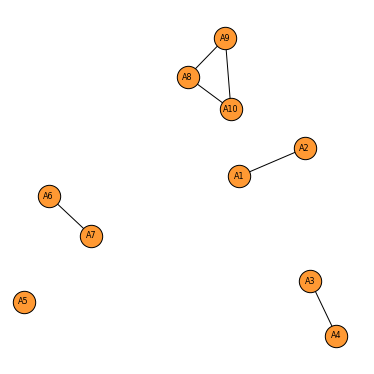

In [41]:
#Author-Author graph
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
g = nx.Graph(author_dict)
plt.rcParams["figure.figsize"] = (5,5)
pos=nx.spring_layout(g, k=0.2, iterations=10)
nx.draw(g, pos, with_labels = True,font_size = 8, node_size = 500, node_color = '#ff9933', edge_color='#000000', edgecolors='#000000')
plt.show()

In [17]:
#Writing edge list into text file
author_edges = []
for x in g.edges():
  a=list(re.findall('\d+',str(x)))
  author_edges.append([int(a[0]),int(a[1])])
with open(r"/content/drive/MyDrive/graph1_edgelist.txt", 'w') as fp:
    for item in author_edges:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')

In [18]:
#Function to identify the clique size
def clique_size(g, k):
 edge_cnt = 0
 for clique in nx.find_cliques(g):
        if len(clique) == k:
            edge_cnt += 1
        elif len(clique) > k:
           edge_cnt += len(list(itertools.combinations(clique, k)))
           return edge_cnt

#To find maximum group of authors who are mutually connected
print("Number of cliques of size 3: ", clique_size(g, 3))
print("Number of cliques of size 4: ", clique_size(g, 4))
print("Number of cliques of size 5: ", clique_size(g, 5))

Number of cliques of size 3:  None
Number of cliques of size 4:  None
Number of cliques of size 5:  None


###Graph 2

In [19]:
#Removing NaN values from the reference value list
unique_reference_value = list(dblp_dataset_df_sample['references'].explode().unique())
print("Count of unique reference values before removing NaN values: ",len(unique_reference_value))
for x in unique_reference_value:
  if str(x) == 'nan' or str(x) == 'NaN':
    unique_reference_value.remove(x)
  else:
    pass
print("Count of unique reference values before removing NaN values: ",len(unique_reference_value))

Count of unique reference values before removing NaN values:  16
Count of unique reference values before removing NaN values:  15


In [20]:
#Formatting distinct paper ids to a naming convention such as P1, P2, P3
unique_paper = list(set(unique_reference_value + dblp_dataset_df_sample['id'].to_list()))
non_unique_paper = unique_reference_value + dblp_dataset_df_sample['id'].to_list()
paper_name_convention=['P{}'.format(i) for i in range(1,len(unique_paper)+1)]
print("Count of unique papers: ",len(unique_paper))
print("Count of non unique papers: ", len(non_unique_paper))

Count of unique papers:  20
Count of non unique papers:  20


In [21]:
#Dictionary to map old names with new names
paper_dictionary=dict(zip(unique_paper,paper_name_convention))

In [22]:
#Mapping new values of references names to the column of list of references
dblp_dataset_df_sample["new_references"]=dblp_dataset_df_sample["references"].apply(lambda x: pd.Series(x).map(paper_dictionary).to_list())
dblp_dataset_df_sample["new_id"]=dblp_dataset_df_sample["id"].apply(lambda x: pd.Series(x).map(paper_dictionary))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [23]:
#Dictionary to map ID and references
id_reference_dict =dict(zip(dblp_dataset_df_sample['new_id'],dblp_dataset_df_sample['new_references']))

In [24]:
#Removing keys with NaN values
print("Count of unique id-reference values after removing NaN key values: ", len(id_reference_dict.keys()))
new_id_ref = {}
for key, val in id_reference_dict.copy().items():
  if str(val) == '[]' or str(val) == '[nan]':
    del id_reference_dict[key]
  else:
    pass
print("Count of unique id-reference values after removing NaN key values: ", len(id_reference_dict.keys()))

Count of unique id-reference values after removing NaN key values:  5
Count of unique id-reference values after removing NaN key values:  2


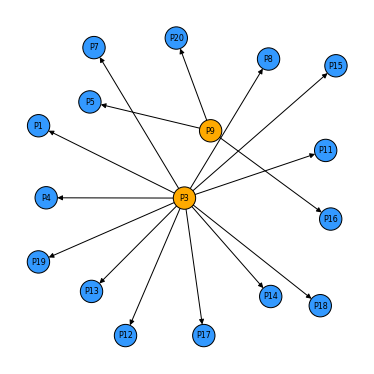

In [45]:
#Paper citation graph
g = nx.DiGraph(id_reference_dict)
#g.remove_edges_from(nx.selfloop_edges(g))
plt.rcParams["figure.figsize"] = (5,5)
node_color_map = ["#ffaa00" if node in id_reference_dict.keys() else "#3399ff" for node in g]
pos=nx.spring_layout(g, k=0.2, iterations=30)
nx.draw(g, pos, with_labels = True,font_size = 8, node_size = 500, node_color = node_color_map,  edgecolors='#000000')
plt.show()

In [26]:
#Top 10 papers that are cited most from these two years
d=nx.in_degree_centrality(g)
top_ten_papers=[]
for x in sorted(d, key=d.get, reverse=True):
    top_ten_papers.append(x)
top_ten_papers = top_ten_papers[0:10]
temp = {j:i for i,j in paper_dictionary.items()}
print('Top 10 most cited papers: ')
for i in top_ten_papers:
  print(temp[i])

Top 10 most cited papers: 
05d0ec98-5acc-4675-b1eb-59a960f106e3
143db266-038d-4496-882d-bc1abbd6c57c
2b38d13a-b290-4cff-a15c-74ded2cd1095
2b8b4fd7-021d-4a7d-a8f1-8ad301f80a18
39a44489-0d56-4f78-abc6-db74c3a29d4e
452afc43-c279-4073-a560-11e917e9d8bf
5443ee2f-a083-4829-bfd3-b92e50b6d78e
5faf992e-2f58-40c8-a9e2-ef2de4bb2262
8a74ac4d-031f-408c-a6a3-ae8718fb4fe7
c3575d4a-31ba-4089-abbc-0d47a81929dd


In [27]:
#Writing edge list into text file
edges_references = []
for i in g.edges():
  a=list(re.findall('\d+',str(i)))
  edges_references.append([int(a[0]),int(a[1])])
with open(r"/content/drive/MyDrive/graph2_edgelist.txt", 'w') as fp:
    for item in edges_references:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')

### Graph 3

In [28]:
#Removing NaN values from the venue column
unique_venue_values = dblp_dataset_df_sample['venue'].unique().tolist()
for i in unique_venue_values:
  if i == '' or str(i) == 'NaN':
    unique_venue_values.remove(i)
  else:
    pass

In [29]:
#Formatting distinct venue names to a naming convention such as V10000, V10001, V10002
venue_name_convention=['V{}'.format(i + 9999) for i in range(1,len(unique_venue_values)+1)]

In [30]:
#Dictionary to map old names with new names
venue_dictionary=dict(zip(unique_venue_values,venue_name_convention))

In [31]:
#Mapping new values of venue names to the column venue
dblp_dataset_df_sample["new_venue"]=dblp_dataset_df_sample['venue'].apply(lambda x: pd.Series(x).map(venue_dictionary))

In [32]:
##Dictionary to map venue with author
venue_author_dicionary=dict(zip(dblp_dataset_df_sample['new_venue'], dblp_dataset_df_sample['new_authors']))

In [33]:
#Check for NaN values
for x in venue_author_dicionary.copy():
  if type(x) == float:
    venue_author_dicionary.pop(x)
venue_author_dicionary

{'V10000': ['A1', 'A2'],
 'V10001': ['A3', 'A4'],
 'V10002': ['A5'],
 'V10003': ['A6', 'A7'],
 'V10004': ['A8', 'A9', 'A10']}

In [34]:
#Mapping author and venue columns
author_venue_dict = {}
for key, value in venue_author_dicionary.items():
    for author in venue_author_dicionary[key]:
      if author not in author_venue_dict.keys():
        author_venue_dict[author] = [key]
      else:
        author_venue_dict[author].extend([key])
print(author_venue_dict)

{'A1': ['V10000'], 'A2': ['V10000'], 'A3': ['V10001'], 'A4': ['V10001'], 'A5': ['V10002'], 'A6': ['V10003'], 'A7': ['V10003'], 'A8': ['V10004'], 'A9': ['V10004'], 'A10': ['V10004']}


In [35]:
#Dictionary to map venue and year
venue_year_dictionary = dict(zip(dblp_dataset_df_sample['new_venue'], dblp_dataset_df_sample['year']))

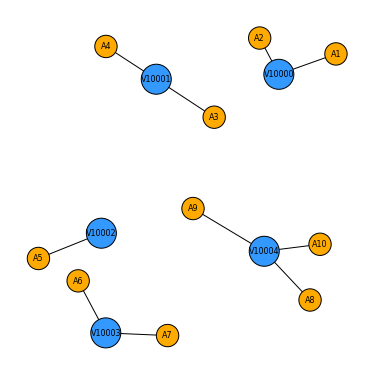

In [56]:
#Author-Venue graph
g = nx.Graph(venue_author_dicionary)
#g.remove_edges_from(nx.selfloop_edges(g))
plt.rcParams["figure.figsize"] = (5,5)
color_map = ["#3399ff" if node in venue_author_dicionary.keys() else "#ffaa00" for node in g]
node_size_map = [900 if node in venue_author_dicionary.keys() else 500 for node in g]
pos=nx.spring_layout(g, k=0.3, iterations=20)
nx.draw(g, pos, with_labels = True,font_size = 8, node_size = node_size_map, node_color = color_map, edgecolors='#000000')
plt.show()

In [38]:
#Writing edge list into text file
edges_venue = []
for i in g.edges():
  a=list(re.findall('\d+',str(i)))
  edges_venue.append([int(a[0]),int(a[1])])
with open(r"/content/drive/MyDrive/graph3_edgelist.txt", 'w') as fp:
    for item in edges_venue:
        fp.writelines(str(item[0])+','+ str(item[1])+'\n')